<a href="https://colab.research.google.com/github/igor531205/gb/blob/HW4/lesson4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Библиотеки Python для Data Science: Numpy, Matplotlib, Scikit-learn.

## Тема “Обучение без учителя в Scikit-learn”

### Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.

Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

Масштабируйте данные с помощью StandardScaler.

Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.

Постройте диаграмму рассеяния на этих данных.


*Импортируем библиотеки pandas, numpy и matplotlib*

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

*Загрузим "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn*

In [5]:
from sklearn.datasets import load_boston

ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


*Загрузим "California housing dataset" из встроенных наборов данных библиотеки sklearn*

In [6]:
from sklearn.datasets import fetch_california_housing

# Загрузка данных
housing = fetch_california_housing()
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = pd.DataFrame(housing.target, columns=['MedHouseVal'])

*Раделим данных на тренировочную и тестовую выборки*

In [8]:
from sklearn.model_selection import train_test_split

# Разделение данных на тренировочные и тестовые выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

*Масштабируем данные с помощью StandardScaler*

In [9]:
from sklearn.preprocessing import StandardScaler

# Масштабирование данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

*Построим модель TSNE на тренировочный данных*

In [10]:
from sklearn.manifold import TSNE

# Применение модели TSNE
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)

*Построим диаграмму рассеяния на этих данных*

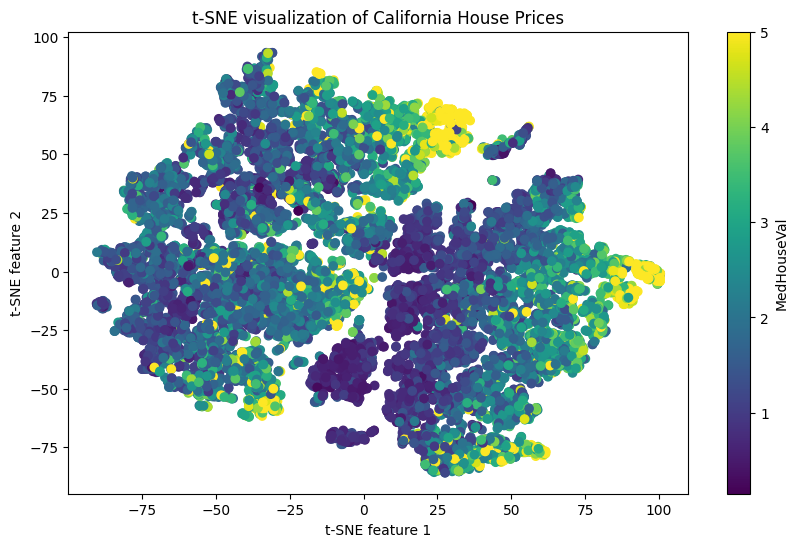

In [11]:
# Построение диаграммы рассеяния
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=y_train.values.ravel(), cmap='viridis')
plt.colorbar(scatter, label='MedHouseVal')
plt.title('t-SNE visualization of California House Prices')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.show()

### Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.

Вычислите средние значения price и CRIM в разных кластерах.


*С помощью KMeans разобъем данные из тренировочного набора на 3 кластера*

In [12]:
from sklearn.cluster import KMeans

# Разбиение данных на кластеры с помощью KMeans
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)
kmeans.fit(X_train_scaled)
clusters = kmeans.predict(X_train_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


*Построим модель TSNE на тренировочный данных*

In [13]:
# Применение t-SNE к данным
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)

*Построим диаграмму рассеяния на этих данных*

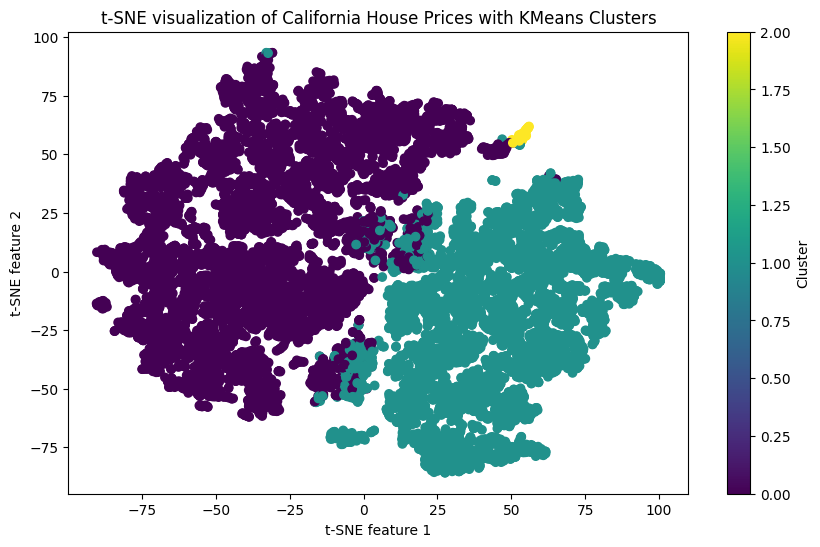

In [14]:
# Построение диаграммы рассеяния для t-SNE данных и кластеров
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=clusters, cmap='viridis')
plt.colorbar(scatter, label='Cluster')
plt.title('t-SNE visualization of California House Prices with KMeans Clusters')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.show()

*Вычислим средние значения price и CRIM в разных кластерах*

In [17]:
# Добавление кластеров к датафрейму
X_train['Cluster'] = clusters
X_train['MedHouseVal'] = y_train.values

# Вычисление средних значений MedHouseVal и CRIM
cluster_means = X_train.groupby('Cluster').mean()[['MedHouseVal', 'AveOccup']]

# Вывод результатов
print(cluster_means)

         MedHouseVal  AveOccup
Cluster                       
0           2.142137  3.044164
1           1.979968  3.174677
2           1.618831  2.527435


### Задание 3
Примените модель KMeans, построенную в предыдущем задании, к данным из тестового набора.

Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

*Применим модель KMeans, построенную в предыдущем задании, к данным из тестового набора*

In [18]:
# Применение модели KMeans к тестовым данным
test_clusters = kmeans.predict(X_test_scaled)

*Вычислим средние значения price и CRIM в разных кластерах*

In [19]:
# Добавление кластеров и целевой переменной к тестовому датафрейму
X_test['Cluster'] = test_clusters
X_test['MedHouseVal'] = y_test.values

# Вычисление средних значений MedHouseVal и CRIM
test_cluster_means = X_test.groupby('Cluster').mean()[['MedHouseVal', 'AveOccup']]

# Вывод результатов
print(test_cluster_means)

         MedHouseVal  AveOccup
Cluster                       
0           2.131424  3.104980
1           1.949519  2.770619
2           1.607133  2.394689
